# Economic Data Analysis with FRED API

# 1. Install  FRED API

In [1]:
!pip install fredapi

  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/96/d4/f81fa9f67775a6a4b9e2cd8487239d61a9698cb2b9c02a5a2897d310f7a4/fredapi-0.5.1-py3-none-any.whl.metadata


In [2]:
!pip show fredapi

Name: fredapi
Version: 0.5.1
Summary: Python API for Federal Reserve Economic Data (FRED) from St. Louis Fed
Home-page: https://github.com/mortada/fredapi
Author: Mortada Mehyar
Author-email: 
License: 
Location: /opt/conda/lib/python3.10/site-packages
Requires: pandas
Required-by: 


## 2. Import libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px


# Plot aesthetics
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# FRED API from kaggle secrets
from fredapi import Fred

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret('fred-api')


## 3. Create Fred object

In [4]:
fred = Fred(api_key=fred_key)

## 4. Begin Search for Economic Data

In [5]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-21,2023-11-21,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-21 08:49:01-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-21,2023-11-21,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2023-11-21,2023-11-21,S&P 500,2013-11-21,2023-11-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-20 19:11:09-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-21,2023-11-21,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-21 08:49:08-06:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-11-21,2023-11-21,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


In [6]:
sp_search.shape

(1000, 15)

## 5. Pull raw data

<Axes: >

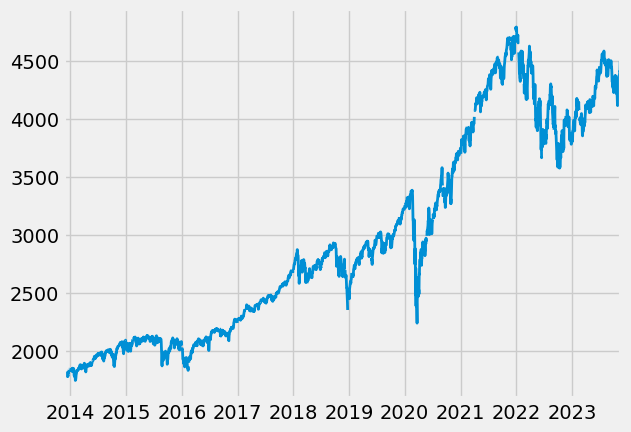

In [7]:
fred.get_series(series_id='SP500').plot(lw=2)

## 6. Pull and Join Multiple Data Series

In [8]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and' +
                                        ' units == "Percent"')
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-21,2023-11-21,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-11-21,2023-11-21,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-11-21,2023-11-21,Unemployment Rate in California,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:01-06:00,62,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-11-21,2023-11-21,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,55,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-11-21,2023-11-21,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,13,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEAGLUR,BEAGLUR,2023-11-21,2023-11-21,Unemployment Rate in Great Lakes BEA Region (D...,1990-01-01,2015-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2016-01-26 12:27:51-06:00,3,None
LNS14024885,LNS14024885,2023-11-21,2023-11-21,"Unemployment Rate - 16-24 Yrs., Men",1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:45-05:00,3,The series comes from the 'Current Population ...
CMTNUR,CMTNUR,2023-11-21,2023-11-21,Unemployment Rate in Mountain Census Division,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:18:15-06:00,3,None


In [9]:
all_results = []

for myid in unemployment_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    
    all_results.append(results)

In [10]:
unemployment_results = pd.concat(all_results, axis=1)
unemployment_results

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,NYUR,TXUR,LNS14000024,U2RATE,FLUR,LNS14000002,LNS14000031,LNS14000009,LNS14027660,LNS14027662,MIUR,LNS14000003,OHUR,LNS14000001,LNS14024887,ALUR,COUR,PAUR,NCUR,LRUN64TTUSM156S,ILUR,MAUR,MNUR,KYUR,GAUR,LNS14027659,VAUR,WIUR,AZUR,NJUR,NMUR,MDUR,WAUR,IAUR,AKUR,ORUR,SCUR,LNS14000012,TNUR,WVUR,UTUR,LNS14032183,LAUR,INUR,MOUR,HIUR,NVUR,OKUR,ARUR,NDUR,LASMT261982000000003,PRUR,MTUR,LNS14000036,CTUR,DCUR,IDUR,MSUR,WYUR,KSUR,NHUR,NEUR,LNS14000060,LNS14000018,MEUR,RIUR,SDUR,LASMT391746000000003,CMWRUR,DEUR,VTUR,LNS14000028,LNS14027689,CNERUR,LNS14000048,LNS14024230,LNS14000032,LNS14000026,CSOUUR,LNS14000089,LRUNTTTTUSM156S,LNS14200000,LNS14000025,LNS14000150,LRUN24TTUSM156S,LNS14000062,LNS14023705,LNS14100000,LRUN25TTUSM156S,LNS14000315,LNS14000029,LNS14024231,M08318USM156SNBR,LNS14000038,CNEWUR,LRUN25FEUSM156S,M08320USM156SNBR,LNS14000154,LNS14000050,CWNCUR,DSUR,LNS14000049,LNS14000334,USAURHARMMDSMEI,BEAGLUR,LNS14024885,CMTNUR,M08311USM156SNBR,LNS14000037
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,3.6,6.0,4.6,NaN,NaN,3.9,4.1,3.3,1.7,2.6,3.4,5.9,4.3,3.9,2.0,3.6,3.1,3.4,3.7,7.5,2.2,2.8,3.8,3.3,3.635787,4.0,2.6,2.9,3.8,3.2,6.0,2.7,2.5,3.5,3.7,3.5,2.0,3.8,2.7,3.7,3.5

In [11]:
columns_to_drop = []

for cols in unemployment_results.columns:
    if len(cols) > 4:
        columns_to_drop.append(cols)

columns_to_drop

['UNRATE',
 'LNS14000006',
 'M0892AUSM156SNBR',
 'M0892BUSM156SNBR',
 'LNS14000024',
 'U2RATE',
 'LNS14000002',
 'LNS14000031',
 'LNS14000009',
 'LNS14027660',
 'LNS14027662',
 'LNS14000003',
 'LNS14000001',
 'LNS14024887',
 'LRUN64TTUSM156S',
 'LNS14027659',
 'LNS14000012',
 'LNS14032183',
 'LASMT261982000000003',
 'LNS14000036',
 'LNS14000060',
 'LNS14000018',
 'LASMT391746000000003',
 'CMWRUR',
 'LNS14000028',
 'LNS14027689',
 'CNERUR',
 'LNS14000048',
 'LNS14024230',
 'LNS14000032',
 'LNS14000026',
 'CSOUUR',
 'LNS14000089',
 'LRUNTTTTUSM156S',
 'LNS14200000',
 'LNS14000025',
 'LNS14000150',
 'LRUN24TTUSM156S',
 'LNS14000062',
 'LNS14023705',
 'LNS14100000',
 'LRUN25TTUSM156S',
 'LNS14000315',
 'LNS14000029',
 'LNS14024231',
 'M08318USM156SNBR',
 'LNS14000038',
 'CNEWUR',
 'LRUN25FEUSM156S',
 'M08320USM156SNBR',
 'LNS14000154',
 'LNS14000050',
 'CWNCUR',
 'LNS14000049',
 'LNS14000334',
 'USAURHARMMDSMEI',
 'BEAGLUR',
 'LNS14024885',
 'CMTNUR',
 'M08311USM156SNBR',
 'LNS14000037']

In [12]:
unemployment_results = unemployment_results.drop(columns=columns_to_drop, axis=1) \
                                    .drop(columns='DSUR', axis=1)

unemployment_results

,CAUR,NYUR,TXUR,FLUR,MIUR,OHUR,ALUR,COUR,PAUR,NCUR,ILUR,MAUR,MNUR,KYUR,GAUR,VAUR,WIUR,AZUR,NJUR,NMUR,MDUR,WAUR,IAUR,AKUR,ORUR,SCUR,TNUR,WVUR,UTUR,LAUR,INUR,MOUR,HIUR,NVUR,OKUR,ARUR,NDUR,PRUR,MTUR,CTUR,DCUR,IDUR,MSUR,WYUR,KSUR,NHUR,NEUR,MEUR,RIUR,SDUR,DEUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,3.9,4.1,2.6,3.6,3.4,2.2,2.8,3.8,3.3,4.0,2.6,2.9,3.8,3.2,2.7,2.5,3.5,3.7,3.5,2.0,3.8,2.7,3.7,3.5,3.1,3.2,3.3,2.4,3.6,3.2,2.6,3.0,5.4,2.7,2.6,2.0,6.1,2.4,3.7,5.1,2.7,3.1,3.1,2.8,1.8,1.9,2.4,2.9,1.8,4.2,1.9
2023-07-01,4.6,3.9,4.1,2.7,3.6,3.3,2.1,2.9,3.5,3.3,4.0,2.5,3.0,3.9,3.2,2.5,2.6,3.6,3.9,3.6,1.8,3.6,2.7,3.8,3.4,3.1,3.1,3.4,2.4,3.4,3.3,2.7,2.8,5.3,2.7,2.6,2.0,6.2,2.5,3.6,5.0,2.8,3.0,3.0,2.7,1.7,2.0,2.4,2.8,1.9,4.1,1.8
2023-08-01,4.6,3.9,4.1,2.7,3.7,3.4,2.1,3.1,3.5,3.3,4.1,2.6,3.1,4.0,3.3,2.5,2.9,3.8,4.2,3.7,1.7,3.6,2.9,3.9,3.4,3.0,3.1,3.6,2.5,3.3,3.4,2.8,2.8,5.4,2.8,2.7,1.9,6.2,2.5,3.5,5.0,3.0,3.2,2.9,2.7,1.8,2.0,2.5,2.7,1.9,4.1,1.8
2023-09-01,4.7,4.0,4.1,2.8,3.9,3.4,2.2,3.2,3.4,3.4,4.4,2.6,3.1,4.1,3.4,2.5,3.1,4.0,4.4,3.7,1.6,3.6,3.0,4.1,3.5,2.9,3.2,3.8,2.6,3.3,3.6,2.9,2.8,5.4,3.0,2.9,1.9,6.0,2.7,3.5,5.0,3.1,3.2,2.9,2.8,2.0,2.1,2.7,2.6,1.9,4.1,1.9


In [13]:
for index, cols in enumerate(unemployment_results.columns):
    print(index, cols)

0 CAUR
1 NYUR
2 TXUR
3 FLUR
4 MIUR
5 OHUR
6 ALUR
7 COUR
8 PAUR
9 NCUR
10 ILUR
11 MAUR
12 MNUR
13 KYUR
14 GAUR
15 VAUR
16 WIUR
17 AZUR
18 NJUR
19 NMUR
20 MDUR
21 WAUR
22 IAUR
23 AKUR
24 ORUR
25 SCUR
26 TNUR
27 WVUR
28 UTUR
29 LAUR
30 INUR
31 MOUR
32 HIUR
33 NVUR
34 OKUR
35 ARUR
36 NDUR
37 PRUR
38 MTUR
39 CTUR
40 DCUR
41 IDUR
42 MSUR
43 WYUR
44 KSUR
45 NHUR
46 NEUR
47 MEUR
48 RIUR
49 SDUR
50 DEUR
51 VTUR


In [14]:
for entry in unemployment_df['id']:
    if len(entry) == 4:
        print(unemployment_df.loc[entry])

id                                                      CAUR
realtime_start                           2023-11-21 00:00:00
realtime_end                             2023-11-21 00:00:00
title                        Unemployment Rate in California
observation_start                        1976-01-01 00:00:00
observation_end                          2023-10-01 00:00:00
frequency                                            Monthly
frequency_short                                            M
units                                                Percent
units_short                                                %
seasonal_adjustment                      Seasonally Adjusted
seasonal_adjustment_short                                 SA
last_updated                       2023-11-20 11:19:01-06:00
popularity                                                62
notes                                                   None
Name: CAUR, dtype: object
id                                                    NYUR
